In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and Read dataset
df=pd.read_csv('data.csv',encoding='ISO-8859-1')
print("Dimension: ",df.shape)

Dimension:  (541909, 8)


In [3]:
# Displaying first 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Statistical Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Data types of all columns
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# data type of InvoiceDate should be datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [8]:
# Again check for data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
# Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Null values are in
# Description : 1454
# CustomerID : 135080

In [11]:
# Total count of rows
df.shape[0]

541909

In [12]:
column_info=pd.DataFrame(df.dtypes,columns=['Col Type'])
column_info['Null Values']=df.isnull().sum()
column_info['Null values (%)']=round((df.isnull().sum()/df.shape[0])*100,2)
column_info

,Col Type,Null Values,Null values (%)
InvoiceNo,object,0,0.00
StockCode,object,0,0.00
Description,object,1454,0.27
Quantity,int64,0,0.00
InvoiceDate,datetime64[ns],0,0.00
UnitPrice,float64,0,0.00
CustomerID,float64,135080,24.93
Country,object,0,0.00


*CustomerID* Contribute approx. 25% of missing data

There are many methods to impute missing values but it is not possible to impute them for CustomerID hence best option is to delete all the missing values of CustomerID

In [13]:
# Dropping missing values from dataframe
df.dropna(inplace=True)
print("Shape of df: ",df.shape)

Shape of df:  (406829, 8)


In [14]:
column_info=pd.DataFrame(df.dtypes,columns=['Col Type'])
column_info['Null Values']=df.isnull().sum()
column_info['Null values (%)']=round((df.isnull().sum()/df.shape[0])*100,2)
column_info

,Col Type,Null Values,Null values (%)
InvoiceNo,object,0,0.0
StockCode,object,0,0.0
Description,object,0,0.0
Quantity,int64,0,0.0
InvoiceDate,datetime64[ns],0,0.0
UnitPrice,float64,0,0.0
CustomerID,float64,0,0.0
Country,object,0,0.0


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now All the missing values are deleted and now we get 100% data

Checking for duplicate values and deleting it

In [16]:
print("Duplicate entries :" ,df.duplicated().sum())

Duplicate entries : 5225


In [17]:
# Removing these duplicate values
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates : ",df.shape)

Shape after removing duplicates :  (401604, 8)


In [18]:
df.to_csv("EDA.csv",index=False)

Information about Countries

In [19]:
temp=df[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count().reset_index()
temp

,CustomerID,InvoiceNo,Country
0,12346.0,541431,United Kingdom
1,12346.0,C541433,United Kingdom
2,12347.0,537626,Iceland
3,12347.0,542237,Iceland
4,12347.0,549222,Iceland
...,...,...,...
22185,18283.0,579673,United Kingdom
22186,18283.0,580872,United Kingdom
22187,18287.0,554065,United Kingdom
22188,18287.0,570715,United Kingdom


Above data frame display customerID with their diff invoice numbers and their county
It basically gives us information about customers and their country

In [20]:
countries=temp['Country'].value_counts()

In [21]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Netherlands', 'Switzerland', 'Portugal', 'Australia', 'Italy',
       'Finland', 'Sweden', 'Norway', 'Channel Islands', 'Japan', 'Poland',
       'Denmark', 'Cyprus', 'Austria', 'Singapore', 'Malta', 'Unspecified',
       'Iceland', 'USA', 'Canada', 'Israel', 'Greece', 'European Community',
       'Czech Republic', 'Lithuania', 'United Arab Emirates', 'Bahrain',
       'Saudi Arabia', 'RSA', 'Lebanon', 'Brazil'],
      dtype='object', name='Country')

In [22]:
countries.values

array([19857,   603,   458,   319,   119,   105,   101,    71,    70,
          69,    55,    48,    46,    40,    33,    28,    24,    21,
          20,    19,    10,    10,     8,     7,     7,     6,     6,
           6,     5,     5,     4,     3,     2,     2,     1,     1,
           1])

In [23]:
print("No. of countries in dataframe:",len(temp['Country'].value_counts()))

No. of countries in dataframe: 37


In [24]:
# Checking data type of customerID
df['CustomerID']=df['CustomerID'].astype('str')

In [25]:
# Unique counts of df
def unique_counts(df):
    for i in df.columns:
        count=df[i].nunique()
        print(i,": ",count)
unique_counts(df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37


## Creation of new Features

In [26]:
new_df=df.copy()

In [27]:
new_df['Quantity'].min()

np.int64(-80995)

In [28]:
new_df=new_df[(new_df['Quantity']>0)]
new_df.shape

(392732, 8)

In [29]:
new_df=new_df[(new_df['UnitPrice']>0)]
new_df.shape

(392692, 8)

In [30]:
# New attribute amount by multiplying quantity with unit price
new_df['Amount']=new_df['Quantity']*new_df['UnitPrice']
am=new_df.groupby('CustomerID')['Amount'].sum().reset_index()
am

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [31]:
# New Attribute Frequency to know how many times customer bought a product 
fr=new_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
fr.columns=['CustomerID','Frequency']
fr

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [32]:
data_attributes=pd.merge(am,fr,on='CustomerID',how='inner')
data_attributes

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4333,18280.0,180.60,10
4334,18281.0,80.82,7
4335,18282.0,178.05,12
4336,18283.0,2045.53,721


In [33]:
# New attribute Recency : to know number of days from last purchase
max_date=max(new_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [34]:
new_df['Diff']=max_date-new_df['InvoiceDate']

In [35]:
new_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [36]:
rec=new_df.groupby('CustomerID')['Diff'].min().reset_index()
rec['Diff']=rec['Diff'].dt.days
rec

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


In [37]:
data_attributes=data_attributes.merge(rec,on='CustomerID')
data_attributes.columns=['CustomerID','Amount','Frequency','Recency']
data_attributes

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4333,18280.0,180.60,10,277
4334,18281.0,80.82,7,180
4335,18282.0,178.05,12,7
4336,18283.0,2045.53,721,3


In [38]:
t_quan=new_df.groupby("CustomerID")['Quantity'].sum()
data_attributes=data_attributes.merge(t_quan,on='CustomerID')

In [39]:
data_attributes=data_attributes[['CustomerID','Frequency','Recency','Quantity','Amount']]
data_attributes

,CustomerID,Frequency,Recency,Quantity,Amount
0,12346.0,1,325,74215,77183.60
1,12347.0,182,1,2458,4310.00
2,12348.0,31,74,2341,1797.24
3,12349.0,73,18,631,1757.55
4,12350.0,17,309,197,334.40
...,...,...,...,...,...
4333,18280.0,10,277,45,180.60
4334,18281.0,7,180,54,80.82
4335,18282.0,12,7,103,178.05
4336,18283.0,721,3,1357,2045.53


## Outliers

<Axes: >

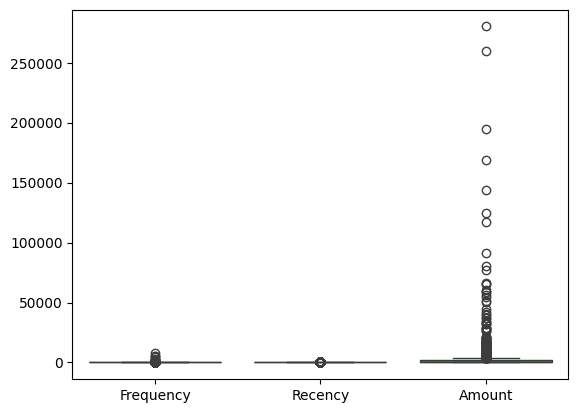

In [40]:
sns.boxplot(data=data_attributes[['Frequency','Recency','Amount']])

In [41]:
# Removing out;iers for amount
q1=data_attributes.Amount.quantile(0.25)
q3=data_attributes.Amount.quantile(0.75)
iqr=q3-q1
data_attributes=data_attributes[(data_attributes['Amount']>=q1-1.5*iqr) & (data_attributes['Amount']<=q3+1.5*iqr)]
# Removing out;iers for recency
q1=data_attributes.Recency.quantile(0.25)
q3=data_attributes.Recency.quantile(0.75)
iqr=q3-q1
data_attributes=data_attributes[(data_attributes['Recency']>=q1-1.5*iqr) & (data_attributes['Recency']<=q3+1.5*iqr)]
# Removing out;iers for frequency
q1=data_attributes.Frequency.quantile(0.25)
q3=data_attributes.Frequency.quantile(0.75)
iqr=q3-q1
data_attributes=data_attributes[(data_attributes['Frequency']>=q1-1.5*iqr) & (data_attributes['Frequency']<=q3+1.5*iqr)]

In [42]:
data_attributes

,CustomerID,Frequency,Recency,Quantity,Amount
2,12348.0,31,74,2341,1797.24
3,12349.0,73,18,631,1757.55
4,12350.0,17,309,197,334.40
5,12352.0,85,35,536,2506.04
6,12353.0,4,203,20,89.00
...,...,...,...,...,...
4332,18278.0,9,73,66,173.90
4333,18280.0,10,277,45,180.60
4334,18281.0,7,180,54,80.82
4335,18282.0,12,7,103,178.05


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(data_attributes[['Frequency','Recency','Amount']])

array([[-0.37781334, -0.24673392,  1.31010905],
       [ 0.65456398, -0.83108046,  1.25744556],
       [-0.72193911,  2.20543459, -0.63089008],
       ...,
       [-0.96774324,  0.8593506 , -0.96735788],
       [-0.84484118, -0.94586281, -0.83834627],
       [ 0.58082274, -0.58064623,  1.36323694]])

In [44]:
cudt_days=new_df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(x.max()-x.min()).days,'Amount':lambda x:x.sum()}).reset_index()
cudt_days.columns=['CustomerID','Total_days_bet_transaction','Amount']

In [45]:
cudt_days

,CustomerID,Total_days_bet_transaction,Amount
0,12346.0,0,77183.60
1,12347.0,365,4310.00
2,12348.0,282,1797.24
3,12349.0,0,1757.55
4,12350.0,0,334.40
...,...,...,...
4333,18280.0,0,180.60
4334,18281.0,0,80.82
4335,18282.0,118,178.05
4336,18283.0,333,2045.53


InvoiceDate =0 Means customer have bought product on 1 day only 

In [46]:
min_year=new_df.groupby('CustomerID')['InvoiceDate'].min()
max_year=new_df.groupby('CustomerID')['InvoiceDate'].max()

In [47]:
cudt_days=cudt_days.merge(min_year,on='CustomerID')
cudt_days

,CustomerID,Total_days_bet_transaction,Amount,InvoiceDate
0,12346.0,0,77183.60,2011-01-18 10:01:00
1,12347.0,365,4310.00,2010-12-07 14:57:00
2,12348.0,282,1797.24,2010-12-16 19:09:00
3,12349.0,0,1757.55,2011-11-21 09:51:00
4,12350.0,0,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280.0,0,180.60,2011-03-07 09:52:00
4334,18281.0,0,80.82,2011-06-12 10:53:00
4335,18282.0,118,178.05,2011-08-05 13:35:00
4336,18283.0,333,2045.53,2011-01-06 14:14:00


In [48]:
cudt_days=cudt_days.merge(max_year,on='CustomerID')
# cudt_days.rename({'InvoiceDate_x':'min_year_trans','InvoiceDate_y':'max_year_trans'})

In [49]:
cudt_days.columns=['CustomerID','Recency','Amount','min_year_trans','max_year_trans'] 

In [50]:
cudt_days['min_year_trans']=cudt_days['min_year_trans'].dt.year
cudt_days['max_year_trans']=cudt_days['max_year_trans'].dt.year

In [51]:
cudt_days

,CustomerID,Recency,Amount,min_year_trans,max_year_trans
0,12346.0,0,77183.60,2011,2011
1,12347.0,365,4310.00,2010,2011
2,12348.0,282,1797.24,2010,2011
3,12349.0,0,1757.55,2011,2011
4,12350.0,0,334.40,2011,2011
...,...,...,...,...,...
4333,18280.0,0,180.60,2011,2011
4334,18281.0,0,80.82,2011,2011
4335,18282.0,118,178.05,2011,2011
4336,18283.0,333,2045.53,2011,2011


In [52]:
s_tran_in_2010=len(cudt_days[cudt_days['min_year_trans']==2010])
print("Customers who start transactions in 2010 are : ",s_tran_in_2010)

Customers who start transactions in 2010 are :  885


In [53]:
s_tran_in_2011=len(cudt_days[cudt_days['min_year_trans']==2011])
print("Customers who start transactions in 2011 are : ",s_tran_in_2011)

Customers who start transactions in 2011 are :  3453


In [54]:
e_tran_in_2010=len(cudt_days[cudt_days['max_year_trans']==2010])
print("Customers who last transactions in 2010 are : ",e_tran_in_2010)

Customers who last transactions in 2010 are :  119


In [55]:
e_tran_in_2011=len(cudt_days[cudt_days['max_year_trans']==2011])
print("Customers who last transactions in 2011 are : ",e_tran_in_2011)

Customers who last transactions in 2011 are :  4219


In [56]:
tran_only_2010=len(cudt_days[(cudt_days['min_year_trans']==2010) & (cudt_days['max_year_trans']==2011)])
tran_only_2011=len(cudt_days[(cudt_days['min_year_trans']==2011) & (cudt_days['max_year_trans']==2011)])

In [57]:
print("Customers who done transactions only in 2010 are : ",tran_only_2010)
print("Customers who done transactions only in 2011 are : ",tran_only_2011)

Customers who done transactions only in 2010 are :  766
Customers who done transactions only in 2011 are :  3453


## Models to implement for annual expenditure of customer

In [58]:
# Models
# Linerar Regression
# Decision Tree Regressor
# Random Forest Regressor

In [59]:
X=data_attributes.drop(['CustomerID','Amount'],axis=1)
Y=data_attributes['Amount']

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [61]:
x_train.shape,y_train.shape

((2869, 3), (2869,))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LINEAR REGRESSION

In [63]:
linear_model=LinearRegression(fit_intercept=False,positive=True)

In [64]:
linear_model.fit(x_train,y_train)

LinearRegression(fit_intercept=False, positive=True)

In [65]:
linear_model.score(x_test,y_test)

0.7248620787474878

In [66]:
para={'fit_intercept':[True,False],'positive':[True,False]}

In [67]:
lin_grid=GridSearchCV(linear_model,para,cv=10)

In [68]:
lin_grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=LinearRegression(fit_intercept=False, positive=True),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [69]:
print(lin_grid.best_params_)
print(lin_grid.best_score_)

{'fit_intercept': True, 'positive': False}
0.6978960277284091


In [70]:
lin_pred=lin_grid.predict(x_test)

In [71]:
print("Training Accuracy:",lin_grid.score(x_train,y_train))
print("Testing Accuracy:",lin_grid.score(x_test,y_test))

Training Accuracy: 0.707737667119543
Testing Accuracy: 0.7301954314603418


In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [73]:
MSE=mean_squared_error(y_test,lin_pred)
MAE=mean_absolute_error(y_test,lin_pred)
RMSE=root_mean_squared_error(y_test,lin_pred)
print(f'''MSE:{MSE}
MAE:{MAE}
RMSE:{RMSE}''')

MSE:163088.39518798655
MAE:262.804444241623
RMSE:403.8420423729884


DECISION TREE REGRESSOR

In [74]:
dt_model=DecisionTreeRegressor()

In [75]:
dt_para={'max_depth':list(range(1,10)),'max_features':list(range(1,4))}

In [76]:
dt_grid=GridSearchCV(dt_model,dt_para,cv=10)

In [77]:
dt_grid.fit(x_train,y_train)

F:\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3]})

In [78]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'max_depth': 4, 'max_features': 3}
0.7727642743568166


In [79]:
dt_pred=dt_grid.predict(x_test)

In [80]:
print("Training Accuracy:",dt_grid.score(x_train,y_train))
print("Testing Accuracy:",dt_grid.score(x_test,y_test))

Training Accuracy: 0.7958006441026035
Testing Accuracy: 0.7578628976010179


In [81]:
MSE=mean_squared_error(y_test,dt_pred)
MAE=mean_absolute_error(y_test,dt_pred)
RMSE=root_mean_squared_error(y_test,dt_pred)
print(f'''MSE:{MSE}
MAE:{MAE}
RMSE:{RMSE}''')

MSE:146364.28011379146
MAE:239.24743524897556
RMSE:382.57584883757556


RANDOM FOREST REGRESSOR

In [82]:
clf_model=RandomForestRegressor()

In [83]:
cf_para={'max_depth':list(range(1,10)),'max_features':list(range(1,4))}

In [84]:
clf_grid=GridSearchCV(clf_model,cf_para,cv=10,verbose=10)

In [85]:
clf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10; 1/27] START max_depth=1, max_features=1...............................
[CV 1/10; 1/27] END max_depth=1, max_features=1;, score=0.529 total time=   0.1s
[CV 2/10; 1/27] START max_depth=1, max_features=1...............................
[CV 2/10; 1/27] END max_depth=1, max_features=1;, score=0.466 total time=   0.1s
[CV 3/10; 1/27] START max_depth=1, max_features=1...............................
[CV 3/10; 1/27] END max_depth=1, max_features=1;, score=0.489 total time=   0.1s
[CV 4/10; 1/27] START max_depth=1, max_features=1...............................
[CV 4/10; 1/27] END max_depth=1, max_features=1;, score=0.532 total time=   0.1s
[CV 5/10; 1/27] START max_depth=1, max_features=1...............................
[CV 5/10; 1/27] END max_depth=1, max_features=1;, score=0.552 total time=   0.1s
[CV 6/10; 1/27] START max_depth=1, max_features=1...............................
[CV 6/10; 1/27] END max_depth=1, max_features=

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3]},
             verbose=10)

In [86]:
print(clf_grid.best_params_)
print(clf_grid.best_score_)

{'max_depth': 5, 'max_features': 2}
0.7876180012827294


In [87]:
clf_pred=clf_grid.predict(x_test)

In [88]:
print("Training Accuracy:",clf_grid.score(x_train,y_train))
print("Testing Accuracy:",clf_grid.score(x_test,y_test))

Training Accuracy: 0.8259413624272165
Testing Accuracy: 0.7905336972406942


In [89]:
acc_table=pd.DataFrame({"Model":["Linear Regression","Decision Tree","Random Forest"],
                        "Accuracy":[lin_grid.score(x_test,y_test),dt_grid.score(x_test,y_test),clf_grid.score(x_test,y_test)]})

In [90]:
acc_table

,Model,Accuracy
0,Linear Regression,0.730195
1,Decision Tree,0.757863
2,Random Forest,0.790534


Text(0.5, 1.0, 'Comparison of Accuracy')

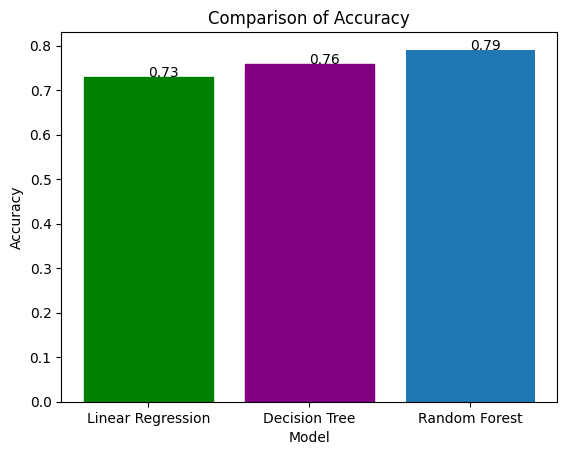

In [91]:
bars=plt.bar(acc_table['Model'],acc_table['Accuracy'])
bars[0].set_color("Green")
bars[1].set_color("Purple")
for i in range(len(acc_table['Model'])):
    plt.text(i,acc_table['Accuracy'][i],round(acc_table['Accuracy'][i],2))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy")

# Hence the best model is Random Forest regressor

## Clustering

In [92]:
from sklearn.cluster import KMeans

In [93]:
x=data_attributes[['Frequency','Recency','Amount']]

In [94]:
x

,Frequency,Recency,Amount
2,31,74,1797.24
3,73,18,1757.55
4,17,309,334.40
5,85,35,2506.04
6,4,203,89.00
...,...,...,...
4332,9,73,173.90
4333,10,277,180.60
4334,7,180,80.82
4335,12,7,178.05


In [95]:
WCSS=[]
for i in range(1,14):
    model_KM=KMeans(n_clusters=i)
    model_KM.fit(x)
    WCSS.append(model_KM.inertia_)

Text(0, 0.5, 'Within cluster sum of squares')

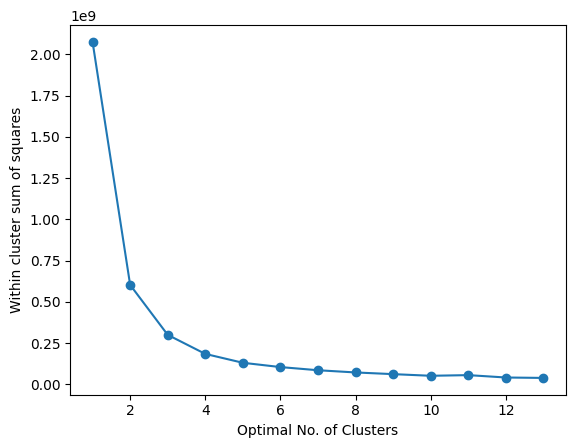

In [96]:
plt.plot(list(range(1,14)),WCSS,marker='o')
plt.xlabel('Optimal No. of Clusters')
plt.ylabel('Within cluster sum of squares')

n_clusters=3

In [97]:
model_km=KMeans(n_clusters=3,max_iter=300)

In [98]:
model_km.fit(x)

KMeans(n_clusters=3)

In [99]:
km_pred=model_km.predict(x)

In [100]:
km_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

In [101]:
data_attributes['cluster']=km_pred

In [102]:
data_attributes

,CustomerID,Frequency,Recency,Quantity,Amount,cluster
2,12348.0,31,74,2341,1797.24,0
3,12349.0,73,18,631,1757.55,0
4,12350.0,17,309,197,334.40,1
5,12352.0,85,35,536,2506.04,2
6,12353.0,4,203,20,89.00,1
...,...,...,...,...,...,...
4332,18278.0,9,73,66,173.90,1
4333,18280.0,10,277,45,180.60,1
4334,18281.0,7,180,54,80.82,1
4335,18282.0,12,7,103,178.05,1


C:\Users\deshp\AppData\Local\Temp\ipykernel_13992\3765938283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data_attributes,x='cluster',y='Amount',palette=['red','green','blue'])


<Axes: xlabel='cluster', ylabel='Amount'>

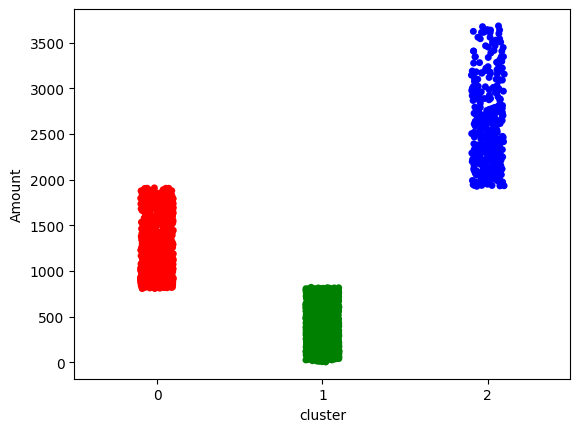

In [112]:
# Box plot to visualize cluster vs amount

sns.stripplot(data=data_attributes,x='cluster',y='Amount',palette=['red','green','blue'])

C:\Users\deshp\AppData\Local\Temp\ipykernel_13992\992087233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data_attributes,x='cluster',y='Frequency',palette=['red','green','blue'])


<Axes: xlabel='cluster', ylabel='Frequency'>

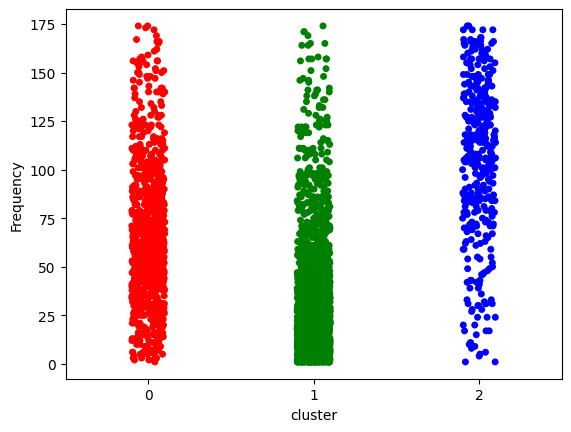

In [113]:
# Box plot to visualize cluster vs frequency

sns.stripplot(data=data_attributes,x='cluster',y='Frequency',palette=['red','green','blue'])

C:\Users\deshp\AppData\Local\Temp\ipykernel_13992\1146959513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data_attributes,x='cluster',y='Recency',palette=['red','green','blue'])


<Axes: xlabel='cluster', ylabel='Recency'>

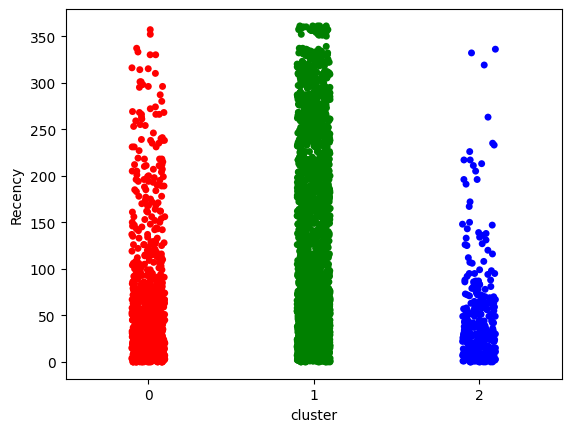

In [114]:
# Box plot to visualize cluster vs recency

sns.stripplot(data=data_attributes,x='cluster',y='Recency',palette=['red','green','blue'])

In [117]:
max_date

Timestamp('2011-12-09 12:50:00')